# Import Dependencies

In [ ]:
import numpy as np
import pandas as pd

# Checking the Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Convert csv file to pandas dataframe
dataset = pd.read_csv("/content/drive/MyDrive/Machine Learning Project Files/Data/sEMG_exercise_stimulus_DB1.csv")

In [ ]:
# Check dataset
print(dataset.head())

   Unnamed: 0   emg_0   emg_1   emg_2   emg_3   emg_4   emg_5   emg_6   emg_7  \
0           0  0.0024  0.0024  0.0024  0.0024  0.0024  0.0098  0.0146  0.0488   
1           1  0.0024  0.0024  0.0024  0.0024  0.0024  0.0098  0.0122  0.0439   
2           2  0.0024  0.0024  0.0024  0.0024  0.0024  0.0073  0.0073  0.0366   
3           3  0.0049  0.0024  0.0024  0.0024  0.0024  0.0073  0.0049  0.0317   
4           4  0.0049  0.0024  0.0024  0.0024  0.0024  0.0024  0.0024  0.0293   

    emg_8   emg_9  exercise  stimulus  
0  0.0024  0.0317         1         0  
1  0.0024  0.0317         1         0  
2  0.0024  0.0293         1         0  
3  0.0024  0.0269         1         0  
4  0.0024  0.0220         1         0  


describe() method shows the statistics of the dataset

In [ ]:
# Describe the dataset
dataset.describe()

,Unnamed: 0,emg_0,emg_1,emg_2,emg_3,emg_4,emg_5,emg_6,emg_7,emg_8,emg_9,exercise,stimulus
count,1.255361e+07,1.255361e+07,1.255361e+07,1.255361e+07,1.255361e+07,1.255361e+07,1.255361e+07,1.255361e+07,1.255361e+07,1.255361e+07,1.255361e+07,1.255361e+07,1.255361e+07
mean,8.541683e+04,2.371501e-01,1.390673e-01,1.256707e-01,6.566251e-02,2.369648e-02,6.114461e-02,3.181594e-01,3.359562e-01,1.229943e-01,2.301168e-01,2.256680e+00,5.637465e+00
std,5.711344e+04,4.277216e-01,3.005849e-01,3.416862e-01,2.094114e-01,8.254346e-02,1.706636e-01,5.483699e-01,4.642163e-01,3.302439e-01,3.848607e-01,7.911712e-01,6.584290e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00
25%,3.874500e+04,2.400000e-03,2.400000e-03,2.400000e-03,2.400000e-03,2.400000e-03,2.400000e-03,2.440000e-02,6.100000e-02,2.400000e-03,1.220000e-02,2.000000e+00,0.000000e+00
50%,7.749100e+04,5.370000e-02,4.900000e-03,2.400000e-03,2.400000e-03,2.400000e-03,4.900000e-03,1.245000e-01,1.807000e-01,2.400000e-03,9.520000e-02,2.000000e+00,3.000000e+00
75%,1.237740e+05,2.832000e-01,1.440000e-01,8.790000e-02,2.440000e-02,7.300000e-03,5.130000e-02,3.589000e-01,4.248000e-01,9.030000e-02,2.783000e-01,3.000000e+00,1.000000e+01
max,2.327090e+05,4.668000e+00,4.668000e+00,4.663100e+00,4.665500e+00,4.663100e+00,4.668000e+00,4.668000e+00,4.668000e+00,4.665500e+00,4.665500e+00,3.000000e+00,2.300000e+01


In [ ]:
# Drop the first unnamed column as it is just the index of values
dataset = dataset.iloc[:, 1:]

In [ ]:
# Take only a short sample of entries
dataset_short = dataset.loc[dataset['exercise']==1]

In [ ]:
# Checking the max value of the target all columns
maxValues = dataset_short.max()
print(maxValues)

emg_0        4.6436
emg_1        4.1895
emg_2        4.6606
emg_3        4.6655
emg_4        0.9717
emg_5        2.4829
emg_6        4.6655
emg_7        4.6680
emg_8        4.6631
emg_9        4.6387
exercise     1.0000
stimulus    12.0000
dtype: float64


# Preprocessing the Data



In [ ]:
# Creating features and labels
X = dataset_short.drop(['stimulus','exercise'], axis=1)
y = dataset_short['stimulus']
X.shape, y.shape

((2731393, 10), (2731393,))

In [ ]:
# Checking all unique values from stimulus column
unique_outputs = dataset_short.stimulus.unique()
len(unique_outputs)

13

In [ ]:
# Creating training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)
len(X), len(X_train), len(X_test), len(y), len(y_train), len(y_test)

(2731393, 1911975, 819418, 2731393, 1911975, 819418)

head() method shows us a sample of the dataset

In [ ]:
X_train.head()

,emg_0,emg_1,emg_2,emg_3,emg_4,emg_5,emg_6,emg_7,emg_8,emg_9
12099419,0.0024,0.0146,0.0024,0.0024,0.0024,0.0024,0.4370,0.0562,0.0024,0.0317
10760495,0.0024,0.1929,1.0278,0.2100,0.0195,0.0415,0.6274,0.2368,2.2266,0.1489
3333538,1.0132,1.5430,1.5601,0.1660,0.0708,0.0928,0.4346,1.7285,1.4941,0.7764
10810605,0.0024,0.4175,0.1831,0.0830,0.0195,0.0439,0.7007,0.5615,0.3052,0.2002
3290623,0.1904,0.0024,0.0024,0.0024,0.0024,0.0024,0.0854,0.1074,0.0024,0.0342


In [ ]:
y_train.head()

12099419     1
10760495     5
3333538     11
10810605     0
3290623      6
Name: stimulus, dtype: int64

Convertind data to numpy array

In [ ]:
# Convert to numpy array
X_train_np = np.asarray(X_train)
y_train_np = np.asarray(y_train)
X_test_np = np.asarray(X_test)
y_test_np = np.asarray(y_test)

In [ ]:
print(len(X_train_np))
print(len(y_train_np))
print(len(X_test_np))
print(len(y_test_np))

1911975
1911975
819418
819418


# Scale the Dataset
Standardization




In [ ]:
from matplotlib.cbook import normalize_kwargs
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler
scaler_train = StandardScaler().fit(X_train_np) 
normalized_X_train = scaler_train.transform(X_train_np) 
scaler_test = StandardScaler().fit(X_test_np) 
normalized_X_test = scaler_test.transform(X_test_np) 

In [ ]:
print('x train before Scaling')
print(X_train_np[0:5])
print('\nx train after Scaling')
print(normalized_X_train[0:5])

x train before Scaling
[[0.0024 0.0146 0.0024 0.0024 0.0024 0.0024 0.437  0.0562 0.0024 0.0317]
 [0.0024 0.1929 1.0278 0.21   0.0195 0.0415 0.6274 0.2368 2.2266 0.1489]
 [1.0132 1.543  1.5601 0.166  0.0708 0.0928 0.4346 1.7285 1.4941 0.7764]
 [0.0024 0.4175 0.1831 0.083  0.0195 0.0439 0.7007 0.5615 0.3052 0.2002]
 [0.1904 0.0024 0.0024 0.0024 0.0024 0.0024 0.0854 0.1074 0.0024 0.0342]]

x train after Scaling
[[-0.58860491 -0.47307083 -0.38438318 -0.32174422 -0.28627526 -0.34829437
   0.24910677 -0.66042409 -0.38928191 -0.58151474]
 [-0.58860491  0.30980897  2.90602933  1.35858896  0.22850518  0.07581928
   0.60576794 -0.17883961  7.11904204 -0.24595519]
 [ 2.49524792  6.23782928  4.61413015  1.00244898  1.77284652  0.63226507
   0.24461104  3.79889891  4.64631149  1.5506627 ]
 [-0.58860491  1.29598286  0.19546619  0.33063947  0.22850518  0.10185183
   0.743075    0.68699917  0.63289257 -0.09907631]
 [-0.01503513 -0.5266386  -0.38438318 -0.32174422 -0.28627526 -0.34829437
  -0.40951753 

In [ ]:
print('x test before Scaling')
print(X_test_np[0:5])
print('\nx test after Scaling')
print(normalized_X_test[0:5])

x test before Scaling
[[0.0049 0.1392 0.4272 0.5054 0.0464 0.0464 0.4053 0.2637 0.0952 0.5225]
 [0.1831 0.0024 0.0024 0.0024 0.0024 0.0024 0.0537 0.3809 0.0293 0.0122]
 [0.0684 0.0024 0.0293 0.0024 0.0024 0.0024 0.0146 0.1733 0.0024 0.3149]
 [0.0146 0.0024 0.0024 0.0024 0.0024 0.0024 0.0195 0.1196 0.0024 0.3198]
 [0.4907 0.1147 0.0171 0.0024 0.0024 0.0024 0.1074 0.2808 0.0024 0.1392]]

x test after Scaling
[[-0.58177282  0.075396    0.98479492  3.74521317  1.03722655  0.13141071
   0.1922355  -0.10546876 -0.0757481   0.82882214]
 [-0.03608885 -0.5256763  -0.38516811 -0.32051254 -0.28502987 -0.34772553
  -0.46893216  0.20712094 -0.29792497 -0.63695578]
 [-0.38732314 -0.5256763  -0.29841668 -0.32051254 -0.28502987 -0.34772553
  -0.54245792 -0.3465789  -0.38861629  0.23251507]
 [-0.55206948 -0.5256763  -0.38516811 -0.32051254 -0.28502987 -0.34772553
  -0.53324369 -0.48980472 -0.38861629  0.24658976]
 [ 0.90584375 -0.03225218 -0.33776119 -0.32051254 -0.28502987 -0.34772553
  -0.36795178 -0

# Train Models

KNN Classifier



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


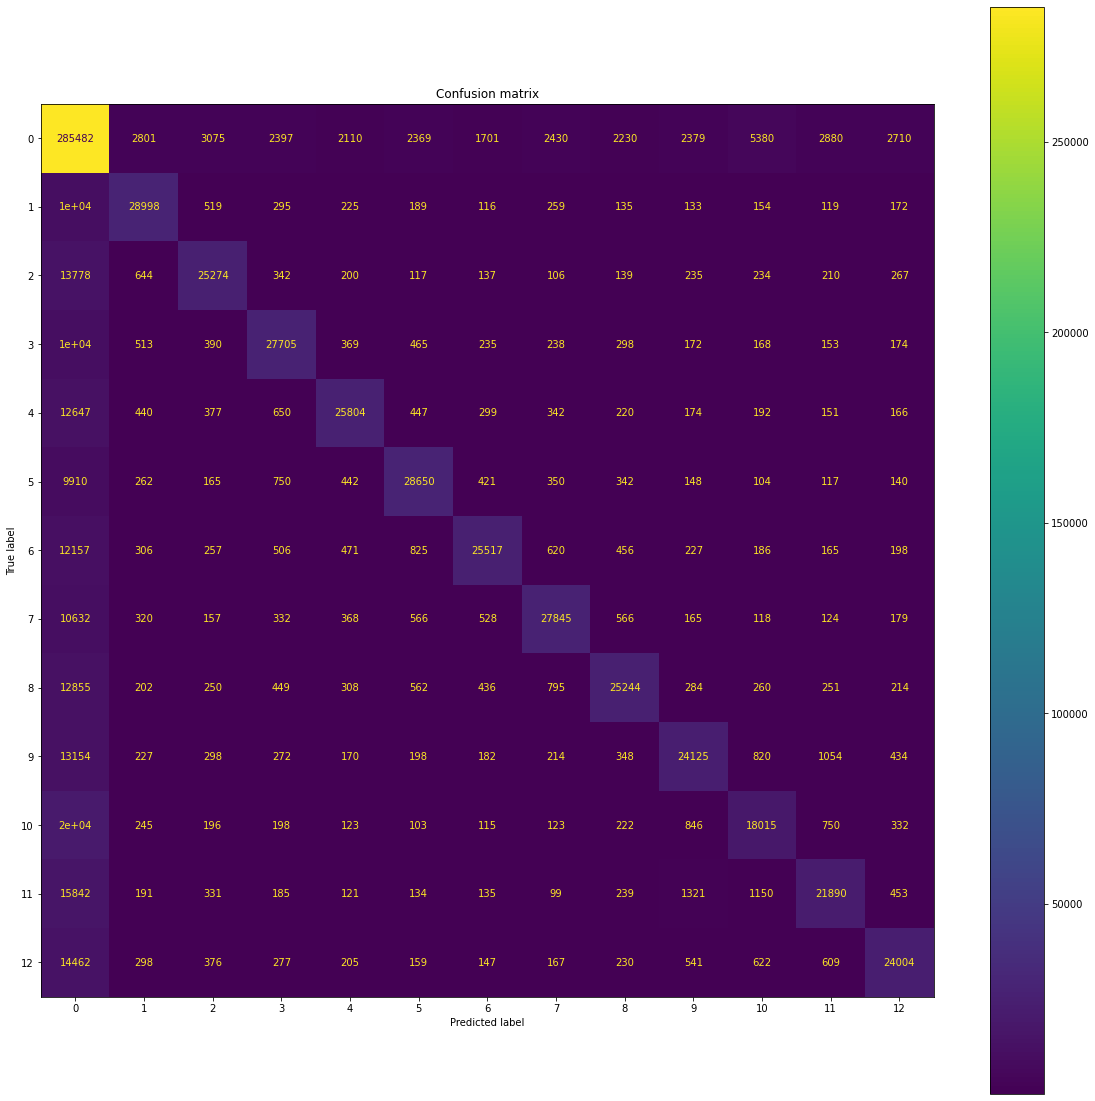

Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.90      0.75    317944
           1       0.82      0.70      0.75     41579
           2       0.80      0.61      0.69     41683
           3       0.81      0.67      0.73     41268
           4       0.83      0.62      0.71     41909
           5       0.82      0.69      0.75     41801
           6       0.85      0.61      0.71     41891
           7       0.83      0.66      0.74     41900
           8       0.82      0.60      0.69     42110
           9       0.78      0.58      0.67     41496
          10       0.66      0.43      0.52     41649
          11       0.77      0.52      0.62     42091
          12       0.82      0.57      0.67     42097

    accuracy                           0.72    819418
   macro avg       0.79      0.63      0.69    819418
weighted avg       0.74      0.72      0.71    819418

Accuracy:0.7182573485083316


In [ ]:
%matplotlib inline
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from matplotlib import pyplot as plt


classifier_knn = KNeighborsClassifier(n_neighbors=7)
classifier_knn.fit(normalized_X_train, y_train_np)
fig, ax = plt.subplots(figsize=(20, 20))
plot_confusion_matrix(classifier_knn, normalized_X_test, y_test_np, ax=ax)
plt.title('Confusion matrix')
plt.show()
y_pred_knn = classifier_knn.predict(normalized_X_test)
result_class_knn = metrics.classification_report(y_test_np, y_pred_knn)
score = metrics.accuracy_score(y_test_np, y_pred_knn)
print("Classification Report:")
print(result_class_knn)
print("Accuracy:" + str(score))

Decision Tree Classifier


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


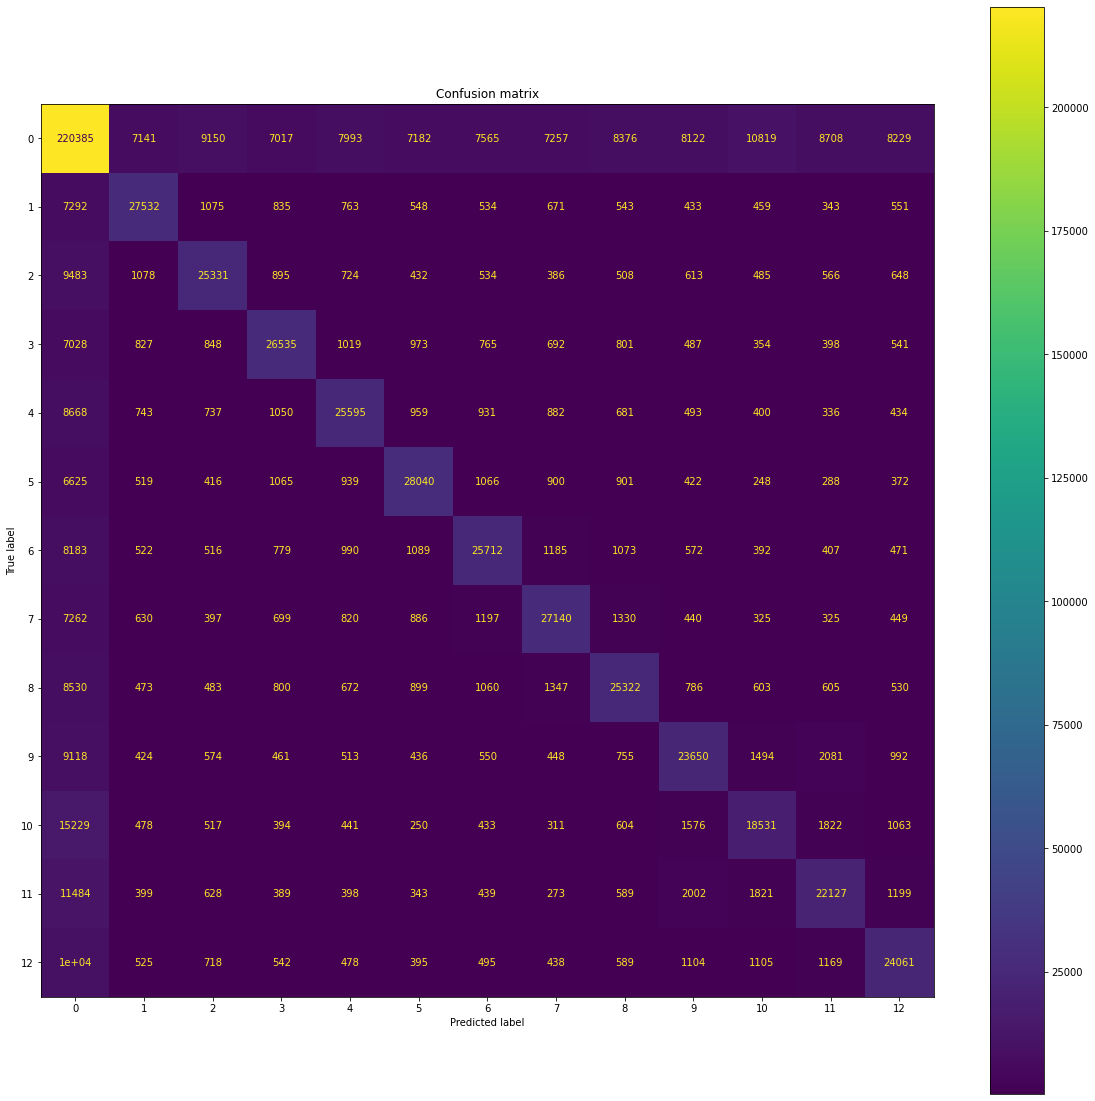

Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.69      0.68    317944
           1       0.67      0.66      0.66     41579
           2       0.61      0.61      0.61     41683
           3       0.64      0.64      0.64     41268
           4       0.62      0.61      0.61     41909
           5       0.66      0.67      0.67     41801
           6       0.62      0.61      0.62     41891
           7       0.65      0.65      0.65     41900
           8       0.60      0.60      0.60     42110
           9       0.58      0.57      0.58     41496
          10       0.50      0.44      0.47     41649
          11       0.56      0.53      0.54     42091
          12       0.61      0.57      0.59     42097

    accuracy                           0.63    819418
   macro avg       0.61      0.60      0.61    819418
weighted avg       0.63      0.63      0.63    819418

Accuracy:0.6345491556202085


In [ ]:
%matplotlib inline
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from matplotlib import pyplot as plt


classifier_dct = DecisionTreeClassifier()
classifier_dct.fit(normalized_X_train, y_train_np)
fig, ax = plt.subplots(figsize=(20, 20))
plot_confusion_matrix(classifier_dct, normalized_X_test, y_test_np, ax=ax)
plt.title('Confusion matrix')
plt.show()
y_pred_dct = classifier_dct.predict(normalized_X_test)
result_class_dct = metrics.classification_report(y_test_np, y_pred_dct)
score = metrics.accuracy_score(y_test_np, y_pred_dct)
print("Classification Report:")
print(result_class_dct)
print("Accuracy:" + str(score))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


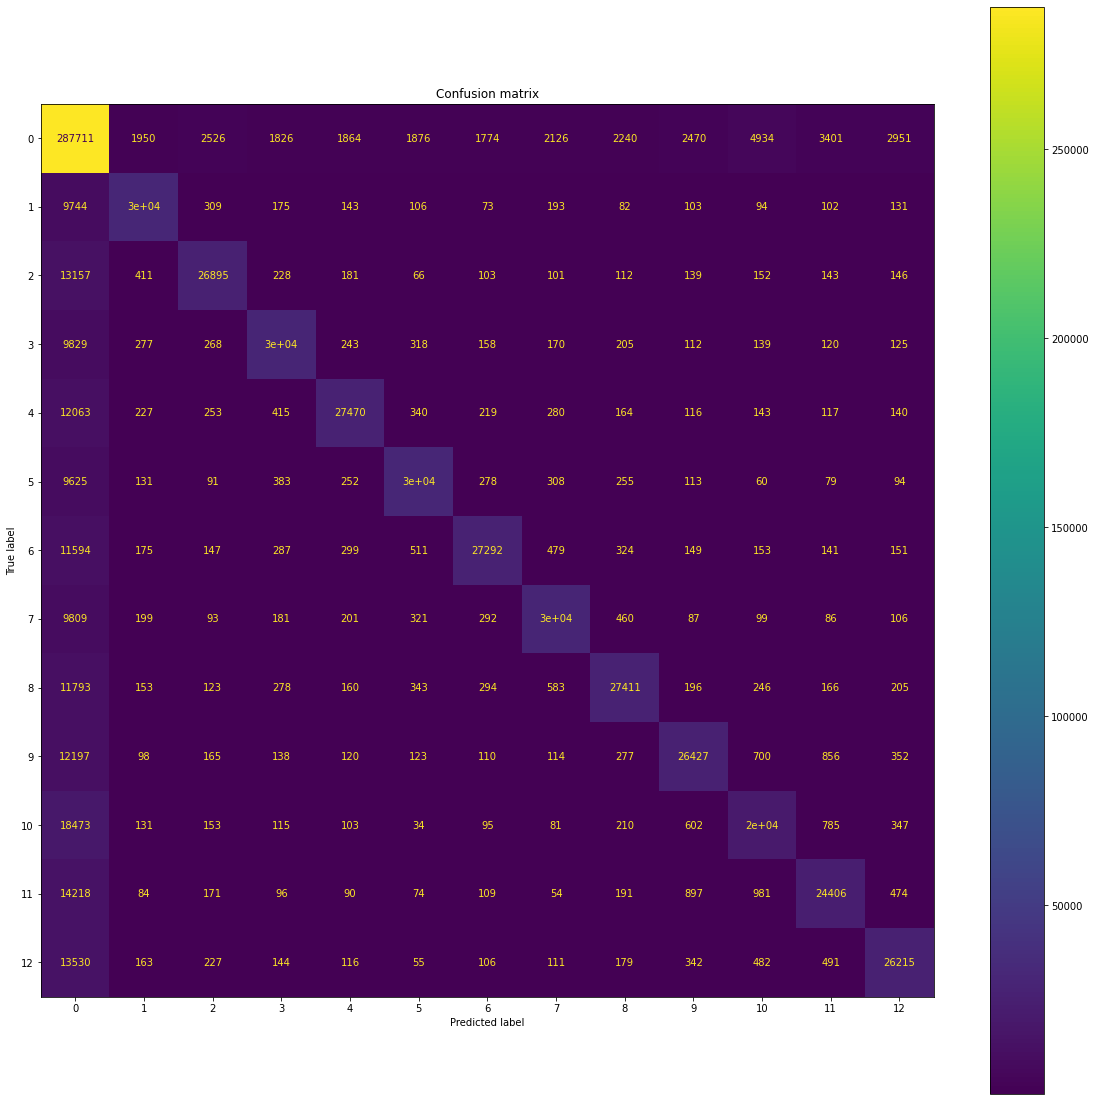

Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.91      0.77    317649
           1       0.88      0.73      0.80     41637
           2       0.86      0.64      0.73     41834
           3       0.87      0.71      0.78     41593
           4       0.88      0.65      0.75     41947
           5       0.88      0.72      0.79     42052
           6       0.88      0.65      0.75     41702
           7       0.87      0.72      0.78     41965
           8       0.85      0.65      0.74     41951
           9       0.83      0.63      0.72     41677
          10       0.71      0.49      0.58     41405
          11       0.79      0.58      0.67     41845
          12       0.83      0.62      0.71     42161

    accuracy                           0.75    819418
   macro avg       0.83      0.67      0.74    819418
weighted avg       0.77      0.75      0.75    819418

Accuracy:0.7499566765680031


In [ ]:
%matplotlib inline
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from matplotlib import pyplot as plt


classifier_rfc = RandomForestClassifier(n_estimators = 50)
classifier_rfc.fit(normalized_X_train, y_train_np)
fig, ax = plt.subplots(figsize=(20, 20))
plot_confusion_matrix(classifier_rfc, normalized_X_test, y_test_np, ax=ax)
plt.title('Confusion matrix')
plt.show()
y_pred_rfc = classifier_rfc.predict(normalized_X_test)
result_class_rfc = metrics.classification_report(y_test_np, y_pred_rfc)
score = metrics.accuracy_score(y_test_np, y_pred_rfc)
print("Classification Report:")
print(result_class_rfc)
print("Accuracy:" + str(score))